In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib inline

This example uses matplotlib 2.0

In [2]:
%matplotlib widget
import sys
print("Python version is {} \n".format(sys.version))
print("Matplotlib version is {} \n".format(mpl.__version__))
print("Matplotlibrc file is {}\n".format(mpl.matplotlib_fname()))

Python version is 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0] 

Matplotlib version is 3.5.2 

Matplotlibrc file is matplotlibrc



and the matplotlibrc file from 
https://github.com/mpmdean/matplotlibrc
please suggest improvements

## A few notes

* All fields are using latex by default -- this avoid non-uniformity when using latex in some labels. 

* Using a uniform style is very important for an attractive manuscript. Try to avoid ad-hoc changes to the settings. 

* If you feel that there is a desirable change, consider applying it to the whole manuscript, preferably by setting some edits to the rc file right at the start of the script/notebook. e.g. mpl.rc('font', size=10). 

## Create figure

* The width of a figure should always be set to the real physical column width. e.g. 3+3/8 inches for a PRL column. This will mean that fonts appear on the page in the correct size.

* Gridspec and subplots_adjust are useful to set the precise location of panels.

* Including 2-4 minor ticks per major tick is usually good.

* Putting the colorbar on separate axes facilities better control over its location. 

* Saving in pdf creates vector graphics and fast performance within pdflatex.

In [3]:
def make_gs():
    gs = GridSpec(2, 5, left=0.02, right=.98, bottom=0.2, top=.93,
                  wspace=0., hspace=0.1, width_ratios=[.8, .05, .8, .8, 1])
    return gs

def set_minors(ax):
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    
def add_label(ax, label, pos='out'):
    if pos == 'out':
        ax.text(-0.05, 1.15, label, transform=ax.transAxes, va='top', ha='right')
    else:
        ax.text(0.08, 0.85, label, transform=ax.transAxes, va='top', ha='left')

markers = cycle(['o', 's', '^', 'v', '>', '<'])

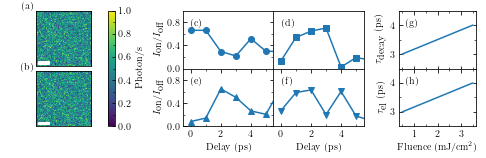

In [4]:
fig = plt.figure(figsize=(6.75, 2.2))

gs0 = make_gs()

image = np.random.random((100, 100))
vmin, vmax = 0, 1

ax0 = plt.subplot(gs0[0, 0])
ax0.imshow(image, vmin=vmin, vmax=vmax)
ax1 = plt.subplot(gs0[1, 0])
art = ax1.imshow(image, vmin=vmin, vmax=vmax)

#gs0 = make_gs()
#gs0.update(left=0, wspace=0)
axcolorbar = plt.subplot(gs0[:, 1])
pos = axcolorbar.get_position()
axcolorbar.set_position([pos.x0-0.02, pos.y0, pos.width, pos.height])
cb = plt.colorbar(art, cax=axcolorbar)
cb.set_label('Photon/s')
cb.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

axs_images = []
for ax in [ax0, ax1]:
    ax.set_xticks([])
    ax.set_yticks([])
    height = 4
    pos = (ax.get_xlim()[0] + 4, ax.get_ylim()[0] - 4 - height)
    ax.add_patch(Rectangle(pos, 20, height, color='w'))
    axs_images.append(ax)

gs1 = make_gs()
gs1.update(left=0.18, wspace=0, hspace=0)

datas = [np.random.rand(10)*.7 for _ in range(4)]
coords = [(i, j) for i in range(2) for j in range(2, 4)]

axs_c = []
for data, coord in zip(datas, coords):
    ax = plt.subplot(gs1[coord[0], coord[1]])
    ax.plot(data, marker=next(markers))
    set_minors(ax)
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_locator(ticker.MaxNLocator(3))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(3))
    ax.set_xlim([-.5, 5.5])
    axs_c.append(ax)

    
[ax.set_xticks([]) for ax in [axs_c[0], axs_c[1]]]
[ax.set_xlabel('Delay (ps)') for ax in [axs_c[2], axs_c[3]]]
[ax.set_yticks([]) for ax in [axs_c[1], axs_c[3]]]
[ax.set_ylabel(r'$I_{\textrm{on}}/I_\textrm{off}$')
 for ax in [axs_c[0], axs_c[2]]]

gs2 = make_gs()
gs2.update(hspace=0, left=0.43)

axsr = []
for rowind in range(2):
    ax = plt.subplot(gs2[rowind, 4])
    ax.plot([.5, 3.5], [3, 4])
    set_minors(ax)
    ax.set_ylim([2.5, 4.5])
    axsr.append(ax)
    

axsr[1].set_xlabel('Fluence (mJ/cm$^2$)')
axsr[0].set_ylabel(r'$\tau_\textrm{decay}$ (ps)')
axsr[1].set_ylabel(r'$\tau_\textrm{el}$ (ps)')


add_label(axs_images[0], '(a)')
add_label(axs_images[1], '(b)')
add_label(axs_c[0], '(c)', pos='in')
add_label(axs_c[1], '(d)', pos='in')
add_label(axs_c[2], '(e)', pos='in')
add_label(axs_c[3], '(f)', pos='in')
add_label(axsr[0], '(g)', pos='in')
add_label(axsr[1], '(h)', pos='in')

fig.savefig('ex_13_multipanel_tr.pdf', dpi=1200)